<img src="./img/oscon.png" width="400">

# Hands-on with Keras and Scikit-learn

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist
import sys

Using TensorFlow backend.


In [70]:
def create_model():
    return model

model = KerasClassifier(build_fn=create_model)

default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size

In [ ]:
def create_model():
    return model

model = KerasClassifier(build_fn=create_model, epochs=20)

The constructor for the KerasClassifier class can also take new arguments that can be passed to your custom create_model() function.

In [ ]:
def create_model(dropout_rate=0.0):
    return model

model = KerasClassifier(build_fn=create_model, dropout_rate=0.2)

The GridSearchCV process when then construct and evaluate one model for each combination of parameters. Cross validation is used to evaluate each individual model and the default of 3-fold cross validation is used, although this can be overridden by specifying the cv argument to the GridSearchCV constructor.

In [ ]:
param_grid = dict(nb_epochs=[10,30,50]) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

Once completed, you can access the outcome of the grid search in the result object returned from grid.fit(). The best_score_ member provides access to the best score observed during the optimization procedure and the best_params_ describes the combination of parameters that achieved the best results.

### Batch Size and Number of Epochs

In [ ]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

### Training Optimization Algorithm

In [ ]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

###  Learning Rate and Momentum

In [ ]:
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

### Network Weight Initialization

In [ ]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

###  Neuron Activation Function

In [ ]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

###  Dropout Regularization

In [ ]:
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

###  Number of Neurons in the Hidden Layer

In [ ]:
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

In [74]:
DATA_DIR = '/tmp/data' if not 'win32' in sys.platform else "c:\\tmp\\data"
data = input_data.read_data_sets(DATA_DIR, one_hot=True)
x_train, y_train = data.train.images,data.train.labels.astype(np.int32)
x_test, y_test = data.test.images,data.test.labels.astype(np.int32)
print(x_train.shape)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
(55000, 784)


In [77]:
def create_model(optimizer='SGD'):
    # create model
    model = Sequential()
    model.add(Dense(10,input_shape = (784,),activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [80]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model, verbose=1, epochs=10, batch_size=128)
optimizer = ['SGD','adam','Adagrad', 'Adadelta']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

Epoch 1/10
36666/36666 [==============================] - 1s - loss: 1.4764 - acc: 0.6442     
Epoch 2/10
36666/36666 [==============================] - 0s - loss: 0.8748 - acc: 0.8223     
Epoch 3/10
36666/36666 [==============================] - 0s - loss: 0.7014 - acc: 0.8447     
Epoch 4/10
36666/36666 [==============================] - 0s - loss: 0.6169 - acc: 0.8549     
Epoch 5/10
36666/36666 [==============================] - 0s - loss: 0.5655 - acc: 0.8622     
Epoch 6/10
36666/36666 [==============================] - 0s - loss: 0.5303 - acc: 0.8673     
Epoch 7/10
36666/36666 [==============================] - 0s - loss: 0.5043 - acc: 0.8721     
Epoch 8/10
36666/36666 [==============================] - 0s - loss: 0.4843 - acc: 0.8749     
Epoch 9/10
36666/36666 [==============================] - 0s - loss: 0.4681 - acc: 0.8786     
Epoch 10/10
36667/36667 [==============================] - 1s - loss: 1.4748 - acc: 0.6329     
Epoch 2/10
36667/36667 [=========================

In [81]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.917636 using {'optimizer': 'adam'}
0.880364 (0.003637) with: {'optimizer': 'SGD'}
0.917636 (0.001619) with: {'optimizer': 'adam'}
0.909691 (0.002604) with: {'optimizer': 'Adagrad'}
0.907709 (0.002455) with: {'optimizer': 'Adadelta'}


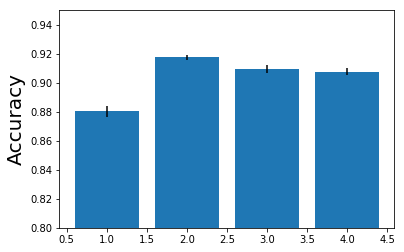

In [88]:
plt.bar([1,2,3,4],means,yerr=stds)
plt.ylim([0.8,0.95])
plt.ylabel('Accuracy',fontsize=20)
plt.show()

In [90]:
from keras.optimizers import SGD

def create_model(optimizer='SGD',learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(10,input_shape = (784,),activation="softmax"))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [93]:
learn_rate = [0.2, 0.3, 0.5]
momentum = [0.0, 0.2, 0.4]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
model = KerasClassifier(build_fn=create_model, verbose=1, epochs=10, batch_size=128)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

Epoch 1/10
36666/36666 [==============================] - 1s - loss: 0.6737 - acc: 0.8360     
Epoch 2/10
36666/36666 [==============================] - 0s - loss: 0.4152 - acc: 0.8878     
Epoch 3/10
36666/36666 [==============================] - 0s - loss: 0.3727 - acc: 0.8976     
Epoch 4/10
36666/36666 [==============================] - 0s - loss: 0.3507 - acc: 0.9021     
Epoch 5/10
36666/36666 [==============================] - 0s - loss: 0.3363 - acc: 0.9065     
Epoch 6/10
36666/36666 [==============================] - 0s - loss: 0.3265 - acc: 0.9081     
Epoch 7/10
36666/36666 [==============================] - 0s - loss: 0.3191 - acc: 0.9106     
Epoch 8/10
36666/36666 [==============================] - 0s - loss: 0.3125 - acc: 0.9127     
Epoch 9/10
36666/36666 [==============================] - 0s - loss: 0.3075 - acc: 0.9133     
Epoch 10/10
36667/36667 [==============================] - 1s - loss: 0.6735 - acc: 0.8323     
Epoch 2/10
36667/36667 [=========================

In [94]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.916218 using {'learn_rate': 0.5, 'momentum': 0.0}
0.910091 (0.003012) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.911618 (0.002748) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.913491 (0.001941) with: {'learn_rate': 0.1, 'momentum': 0.4}
0.916055 (0.000734) with: {'learn_rate': 0.1, 'momentum': 0.8}
0.914327 (0.002140) with: {'learn_rate': 0.2, 'momentum': 0.0}
0.915000 (0.002007) with: {'learn_rate': 0.2, 'momentum': 0.2}
0.915127 (0.001779) with: {'learn_rate': 0.2, 'momentum': 0.4}
0.914291 (0.002541) with: {'learn_rate': 0.2, 'momentum': 0.8}
0.914745 (0.002045) with: {'learn_rate': 0.3, 'momentum': 0.0}
0.915891 (0.003433) with: {'learn_rate': 0.3, 'momentum': 0.2}
0.915564 (0.002828) with: {'learn_rate': 0.3, 'momentum': 0.4}
0.912000 (0.003225) with: {'learn_rate': 0.3, 'momentum': 0.8}
0.916218 (0.001482) with: {'learn_rate': 0.5, 'momentum': 0.0}
0.913673 (0.000899) with: {'learn_rate': 0.5, 'momentum': 0.2}
0.914000 (0.002707) with: {'learn_rate': 0.5, 'momentum': 0.

In [56]:

def create_model(optimizer='SGD',neurons=1024):
    # create model
    model = Sequential()
    model.add(Dense(neurons,input_shape = (784,),activation="relu"))
    optimizer = SGD(lr=0.2)
    model.add(Dense(10,activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [58]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model, verbose=1, epochs=10, batch_size=128)
# batch_size = [32,64]
# param_grid = dict(batch_size=batch_size, epochs=[1])

optimizer = ['SGD']
neurons = [10,50,200]
param_grid = dict(optimizer=optimizer,neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)


Epoch 1/10
36666/36666 [==============================] - 1s - loss: 0.5619 - acc: 0.8337     
Epoch 2/10
36666/36666 [==============================] - 0s - loss: 0.3296 - acc: 0.9033     
Epoch 3/10
36666/36666 [==============================] - 0s - loss: 0.2977 - acc: 0.9142     
Epoch 4/10
36666/36666 [==============================] - 0s - loss: 0.2810 - acc: 0.9191     
Epoch 5/10
36666/36666 [==============================] - 0s - loss: 0.2684 - acc: 0.9233     
Epoch 6/10
36666/36666 [==============================] - 0s - loss: 0.2589 - acc: 0.9266     
Epoch 7/10
36666/36666 [==============================] - 0s - loss: 0.2517 - acc: 0.9282     
Epoch 8/10
36666/36666 [==============================] - 0s - loss: 0.2442 - acc: 0.9304     
Epoch 9/10
36666/36666 [==============================] - 0s - loss: 0.2398 - acc: 0.9318     
Epoch 10/10
36667/36667 [==============================] - 1s - loss: 0.6624 - acc: 0.8000     
Epoch 2/10
36667/36667 [=========================

In [59]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967782 using {'neurons': 200, 'optimizer': 'SGD'}
0.919036 (0.005457) with: {'neurons': 10, 'optimizer': 'SGD'}
0.956055 (0.005081) with: {'neurons': 50, 'optimizer': 'SGD'}
0.967782 (0.001272) with: {'neurons': 200, 'optimizer': 'SGD'}


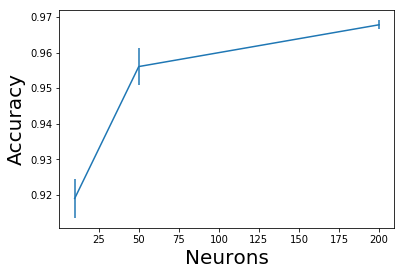

In [69]:
plt.errorbar(neurons,means,stds)
plt.xlabel('Neurons',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()